<a href="https://colab.research.google.com/github/rharkovsky/pucCienciadeDados/blob/main/MVP1_Harkovsky1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# MVP Análise Exploratória de Dados - ROBERTO HARKOVSKY**

## Importando Biliotecas e preparando o Dataset





In [1]:
import pandas as pd
import numpy as np
import missingno as ms 

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## *Carregando Dados*

In [2]:
# url a importar
arquivo = "NetflixOriginals.csv"
url_dados = "/content/gdrive/MyDrive/datasets/" + arquivo


# carga do dataset através do csv
ds = pd.read_csv(url_dados, delimiter=',', encoding='ISO-8859-1')

# verifica o tipo
print(type(ds))

# exibe as 5 primeiras linhas
ds.head()

<class 'pandas.core.frame.DataFrame'>


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


## **Inicio da Análise Exploratória**

In [3]:
# Dimensões do dataset
ds.shape

(584, 6)

In [37]:
# exibe as 5 primeiras linhas
ds.head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


In [5]:
# exibe as 5 últimas linhas
ds.tail()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


Existem varias coluns sem resposta

In [6]:
# Mostra as informações do dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


O dataset é massivo com 52 colunas e cerca de 500k linhas. 

In [7]:
# Nome das colunas
ds.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [8]:
# exibindo a quantidade de linhas por coluna
ds.count()

Title         584
Genre         584
Premiere      584
Runtime       584
IMDB Score    584
Language      584
dtype: int64

Observa-se a ocorrencia de diversas colunas em branco, referente a questões do questionario não respondidas

In [9]:
# Checando número de valores nulls nas colunas
ds.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [10]:
# exibindo um sumário estatístico
ds.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


<Axes: >

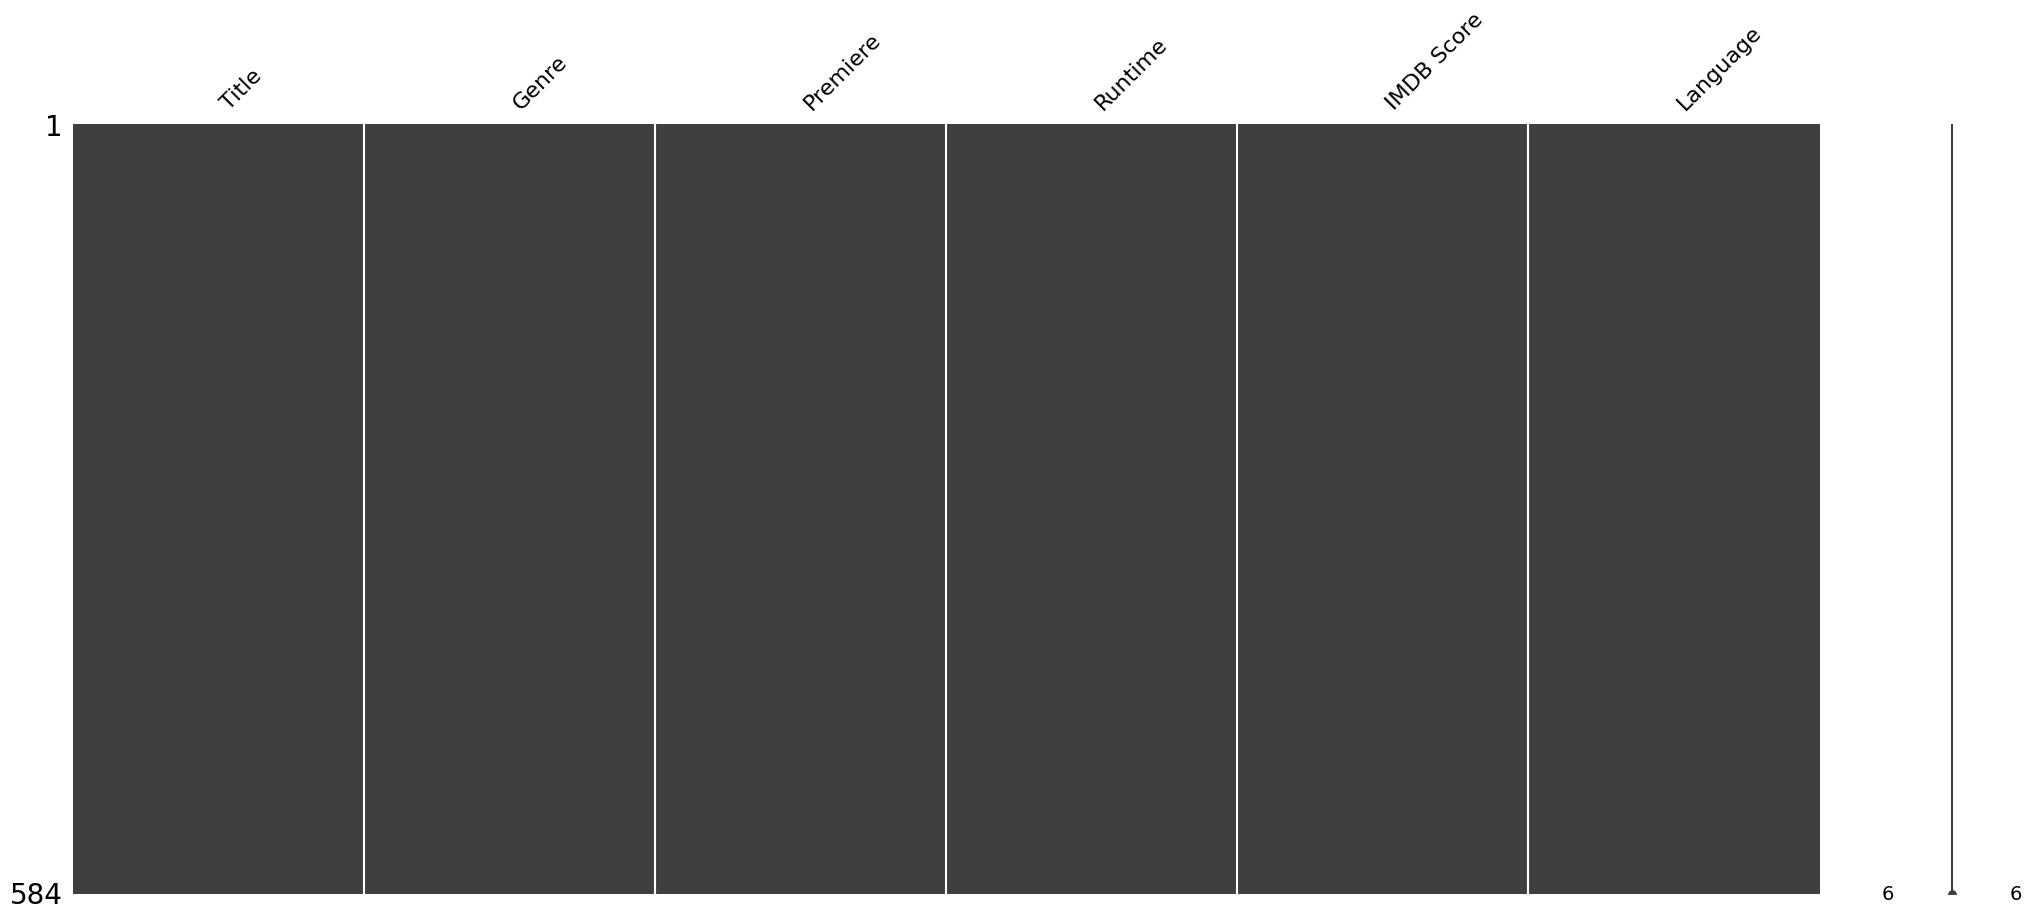

In [50]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(ds.columns)

# o novo dataset irá conter todas as colunas do dataset original
dsNoMiss = ds[col[:]]

# substituindo os zeros por NaN
dsNoMiss.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dsNoMiss)

In [ ]:
# verificando novamente nulls no dataset
dsNoMiss.isnull().sum()
# elencando os generos disponiveis
# dsNoMiss.groupby('Language').size()

## Transformação Categórica

In [126]:
## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# categorizando os dados não numericos
x = dsNoMiss.values[:,0:6]
y = dsNoMiss.values[:, 4]

# ordinal encoding para os atributos x
encoded_X = OrdinalEncoder().fit_transform(x)

# exibindo os dados transformados
print("Atributos transformados:")
print(encoded_X[:5, :]) # 5 primeiras linhas, todas as colunas
print(y[:5])
ds.columns

Atributos transformados:
[[147.  45.  58.  42.   0.   6.]
 [120. 106.  47.  56.   1.  29.]
 [433.  93.  85.  54.   1.  20.]
 [500.  63. 138.  69.   2.   2.]
 [243.  73. 342.  65.   3.  18.]]
[2.5 2.6 2.6 3.2 3.4]


Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

**** :) Ver se da pra colorir as diferentes linguagens ****

Text(0.5, 0, 'Language')

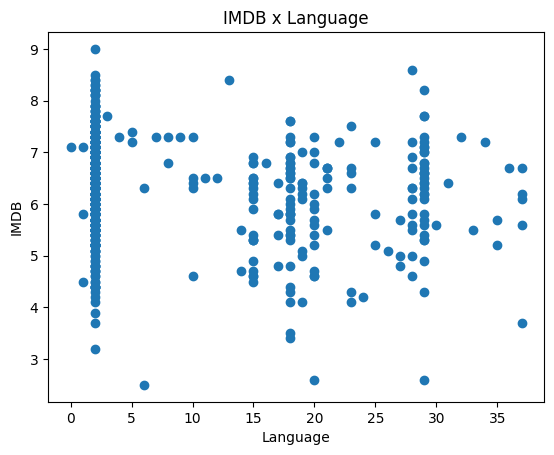

In [134]:
# importação do pyplot
import matplotlib.pyplot as plt

# plotando o gráfico 
plt.scatter(encoded_X[:,5], y)

# incluindo título do gráfico e rótulos dos eixos
plt.title('IMDB x Language')
plt.ylabel('IMDB')
plt.xlabel('Language')


In [ ]:
# importação do pyplot
import matplotlib.pyplot as plt

fig, axs  = plt.subplots(2,3)

# plotando o gráfico 
for i in range(1,6):
  for j in range(1,6):
    axs[i, j].scatter(encoded_X[:,4], encoded_X[:,i])

# incluindo título do gráfico e rótulos dos eixos
#    fig[i, j].title('IMDB x Language')
#    fig[i, j].xlabel('IMDB')
    axs[i, j].ylabel('Language')

In [ ]:
# plotando o gráfico 
plt.scatter(encoded_X[:,4], encoded_X[:,3])

# incluindo título do gráfico e rótulos dos eixos
plt.title('IMDB x Runtime')
plt.xlabel('IMDB')
plt.ylabel('Runtime')

In [ ]:
# importação do pyplot
import matplotlib.pyplot as plt

# plotando o gráfico de comprimento x largura da sépala
plt.scatter(dsSemMissings['IMDB Score'], dsSemMissings['Runtime'])

# incluindo título do gráfico e rótulos dos eixos
plt.title('IMDB x Runtime')
plt.xlabel('IMDB')
plt.ylabel('Runtime')